# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
renda = pd.read_csv('previsao_de_renda.csv')
renda = renda.drop('Unnamed: 0', axis=1)
renda['data_ref'] = pd.DatetimeIndex(renda['data_ref']).date

renda.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
renda_quali = renda[['data_ref','sexo','tipo_renda','educacao','estado_civil','tipo_residencia','renda']]

<AxesSubplot:xlabel='data_ref'>

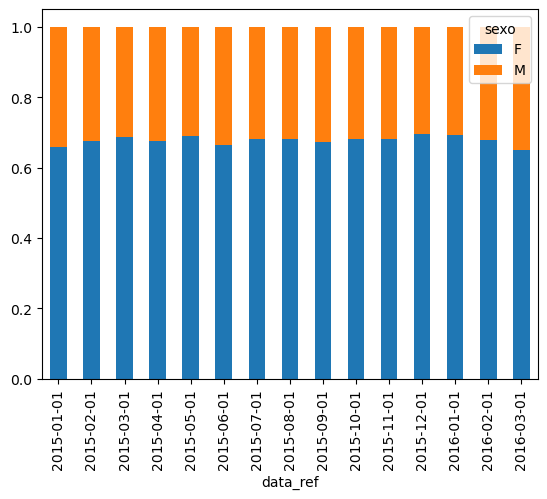

In [4]:
pd.crosstab(renda_quali['data_ref'],renda_quali['sexo'], normalize='index').plot.bar(stacked = True)

<AxesSubplot:xlabel='data_ref'>

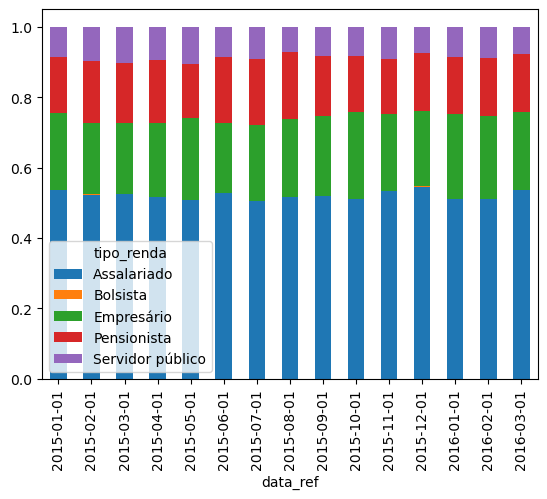

In [5]:
pd.crosstab(renda_quali['data_ref'],renda_quali['tipo_renda'], normalize='index').plot.bar(stacked = True)

<AxesSubplot:xlabel='data_ref'>

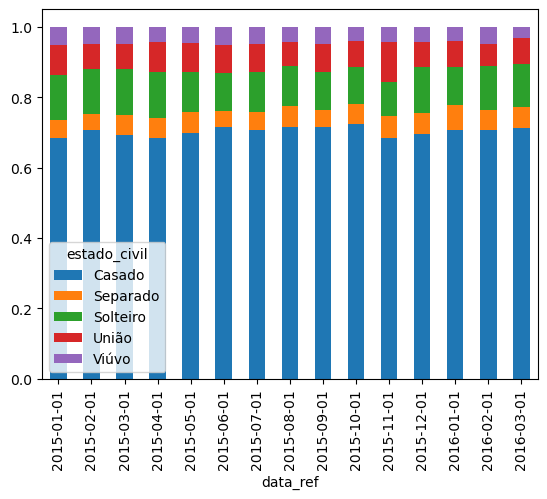

In [6]:
pd.crosstab(renda_quali['data_ref'],renda_quali['estado_civil'], normalize='index').plot.bar(stacked = True)

<AxesSubplot:xlabel='data_ref'>

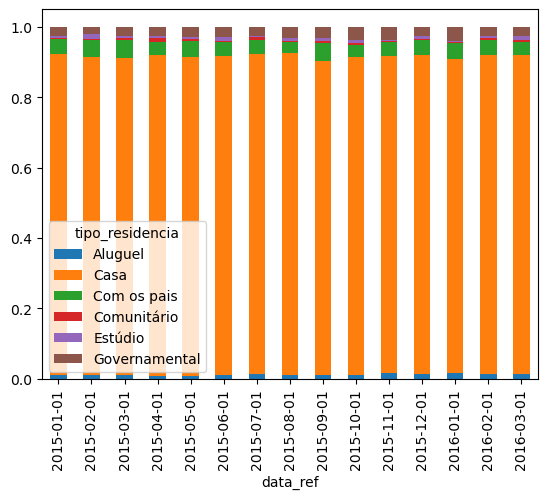

In [7]:
pd.crosstab(renda_quali['data_ref'],renda_quali['tipo_residencia'], normalize='index').plot.bar(stacked = True)

<AxesSubplot:xlabel='data_ref'>

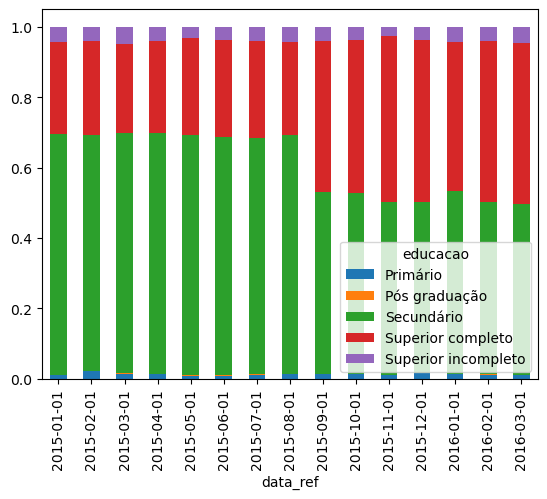

In [8]:
pd.crosstab(renda_quali['data_ref'],renda_quali['educacao'], normalize='index').plot.bar(stacked = True)

## Estabilidade da distribuição das variaveis ao longo do tempo.

A proporção da variavel educação sofreu alteração após o mes de agosto/2015 a proporção de clientes com grau de escolaridade sécundaria caiu aproximadamente 20%.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

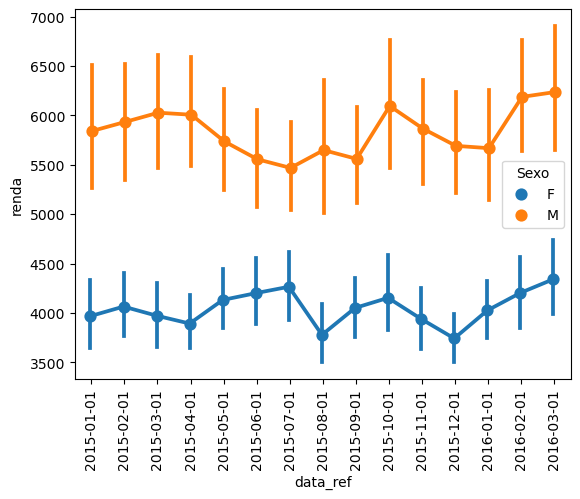

In [9]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=renda_quali, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_quali['data_ref'].unique()

ticks = ax.set_xticks(list(range(renda_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(title='Sexo', loc = 'best')

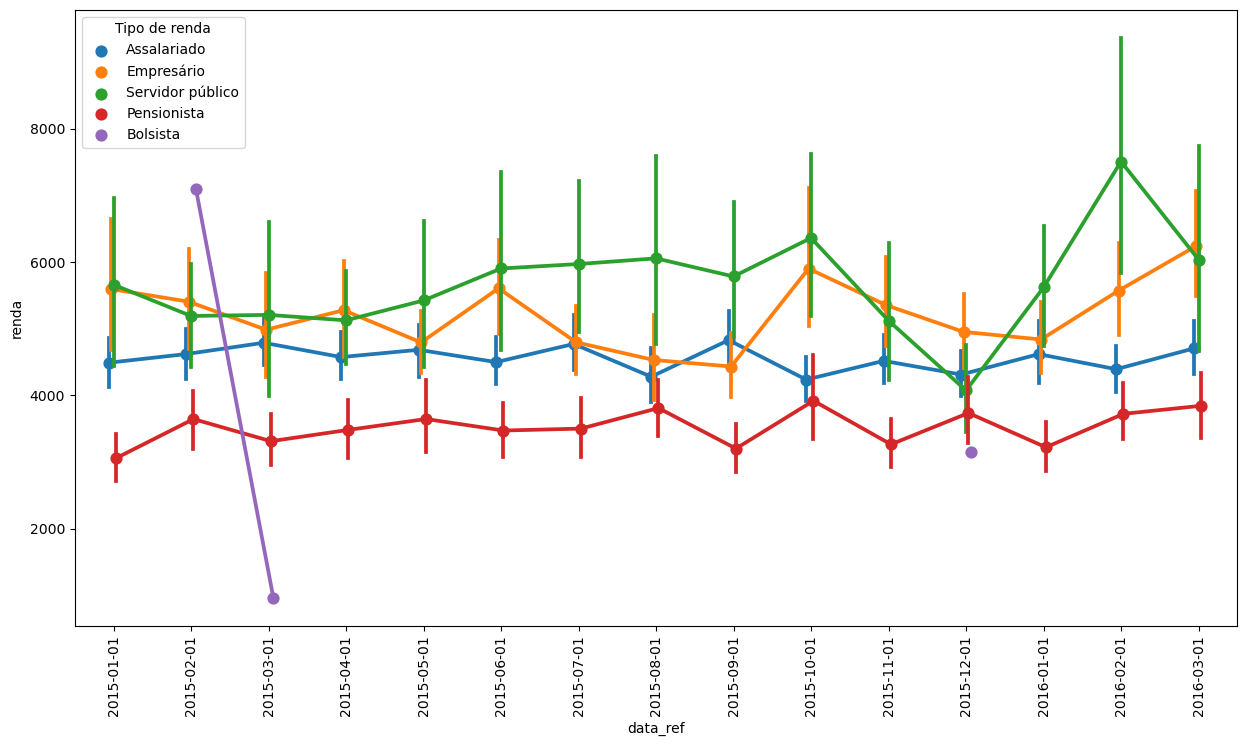

In [10]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_renda',
                   data=renda_quali, dodge=True, ci = 95)

tick_labs = renda_quali['data_ref'].unique()
ticks = ax.set_xticks(list(range(renda_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(title='Tipo de renda', loc = 'best')

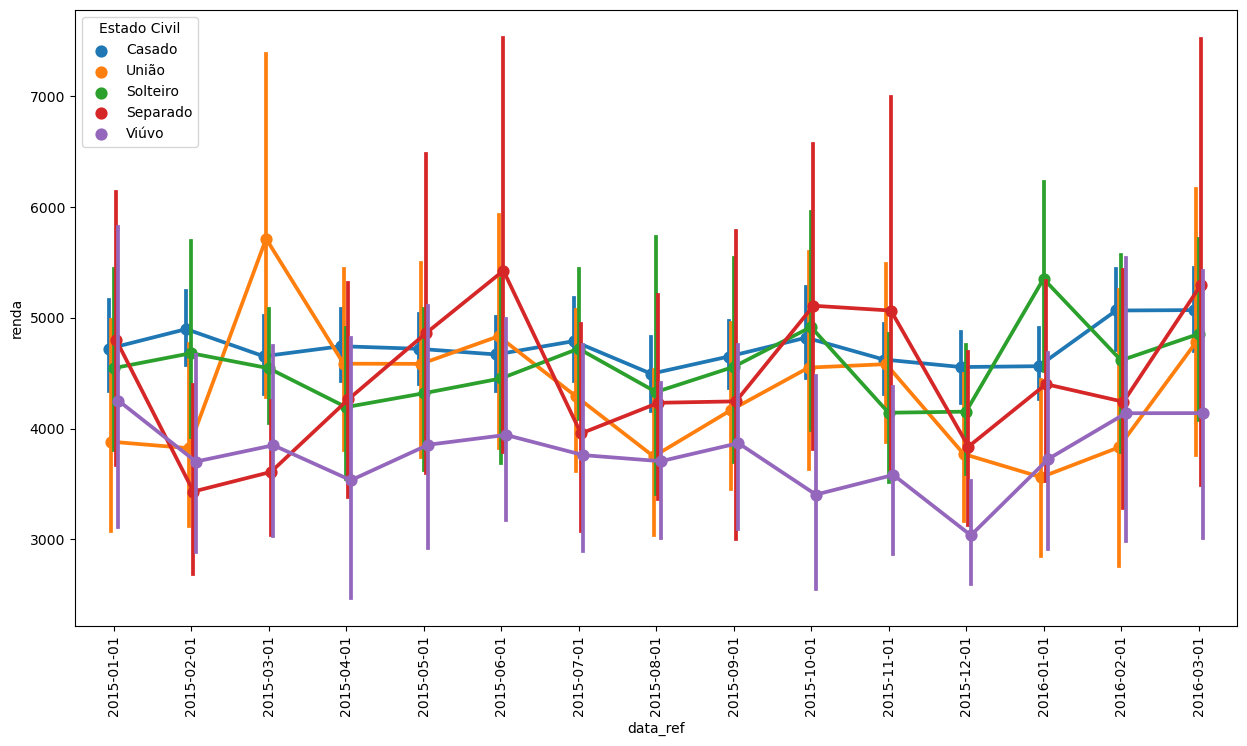

In [11]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'estado_civil',
                   data=renda_quali, dodge=True, ci = 95)

tick_labs = renda_quali['data_ref'].unique()
ticks = ax.set_xticks(list(range(renda_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(title='Estado Civil', loc = 'best')

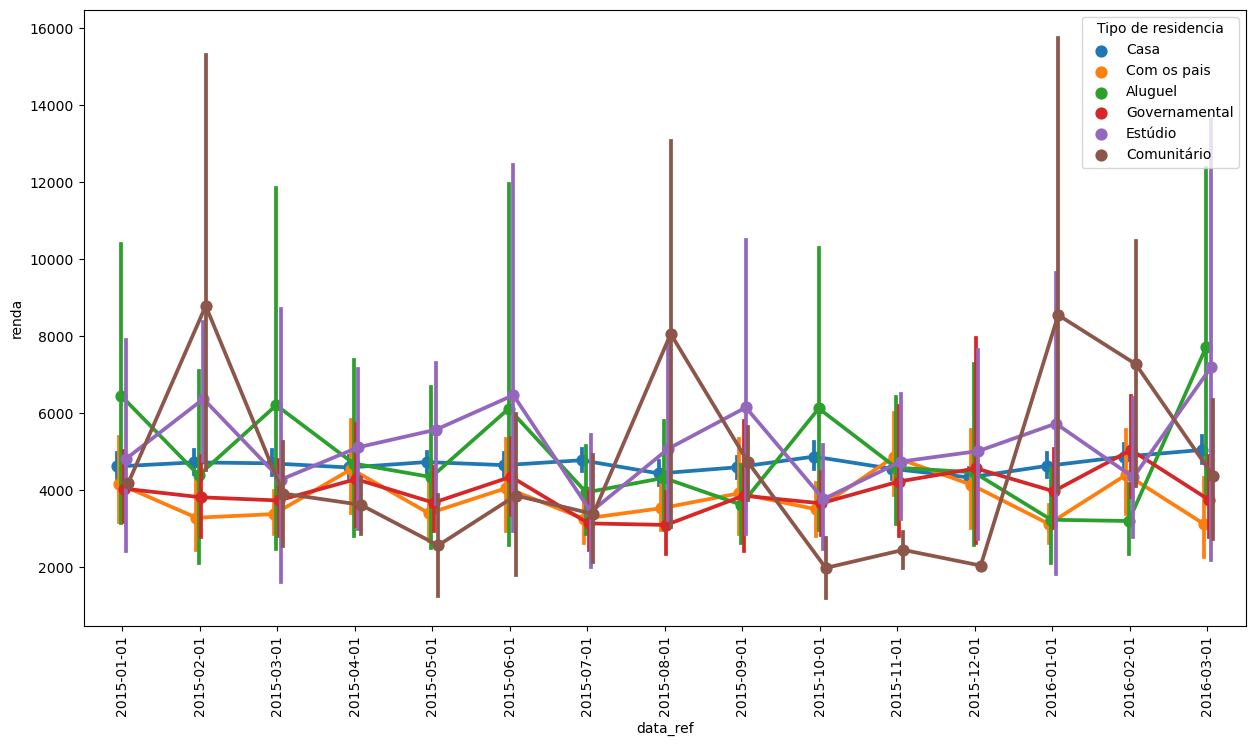

In [12]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_residencia',
                   data=renda_quali, dodge=True, ci = 95)

tick_labs = renda_quali['data_ref'].unique()
ticks = ax.set_xticks(list(range(renda_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(title='Tipo de residencia', loc = 'best')

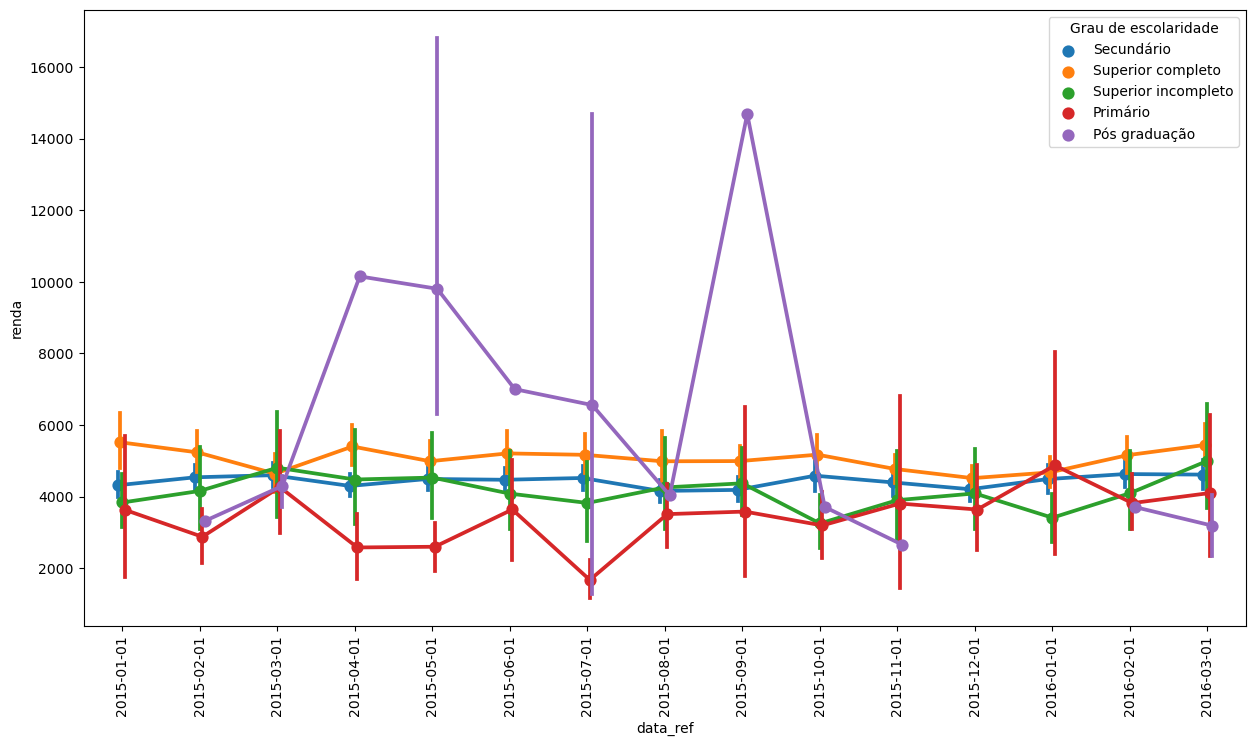

In [13]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'educacao',
                   data=renda_quali, dodge=True, ci = 95)

tick_labs = renda_quali['data_ref'].unique()
ticks = ax.set_xticks(list(range(renda_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(title='Grau de escolaridade', loc = 'best')

## Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Novamente a variável educação chama atenção pelo comportamento dos clientes com pós-graduação que nos meses de abril, maio, junho, julho e setembro (curiosamente não em agosto) um aumento na média de renda. Esta tendencia pode ser explicada pelo menor valor de indivíduos (n) neste grupo e qualquer entrada de um novo individuo com renda discrepante maior que os demais, poluindo a estatística da polução aumentando o desvio padrão. Este outliers devem ser considerados no momento de transportar está variável para uma modelagem. 